In [ ]:
    
# import zip file with csv 
ou_zip = zipfile.ZipFile('../data/anonymisedData.zip') 

# save separate csvs
registrations = pd.read_csv(ou_zip.open('studentRegistration.csv'))
courses = pd.read_csv(ou_zip.open('courses.csv'))
students = pd.read_csv(ou_zip.open('studentInfo.csv'))
student_vle = pd.read_csv(ou_zip.open('studentVle.csv'))
vle = pd.read_csv(ou_zip.open('vle.csv'))
student_assessments = pd.read_csv(ou_zip.open('studentAssessment.csv'))
assessments = pd.read_csv(ou_zip.open('assessments.csv'))

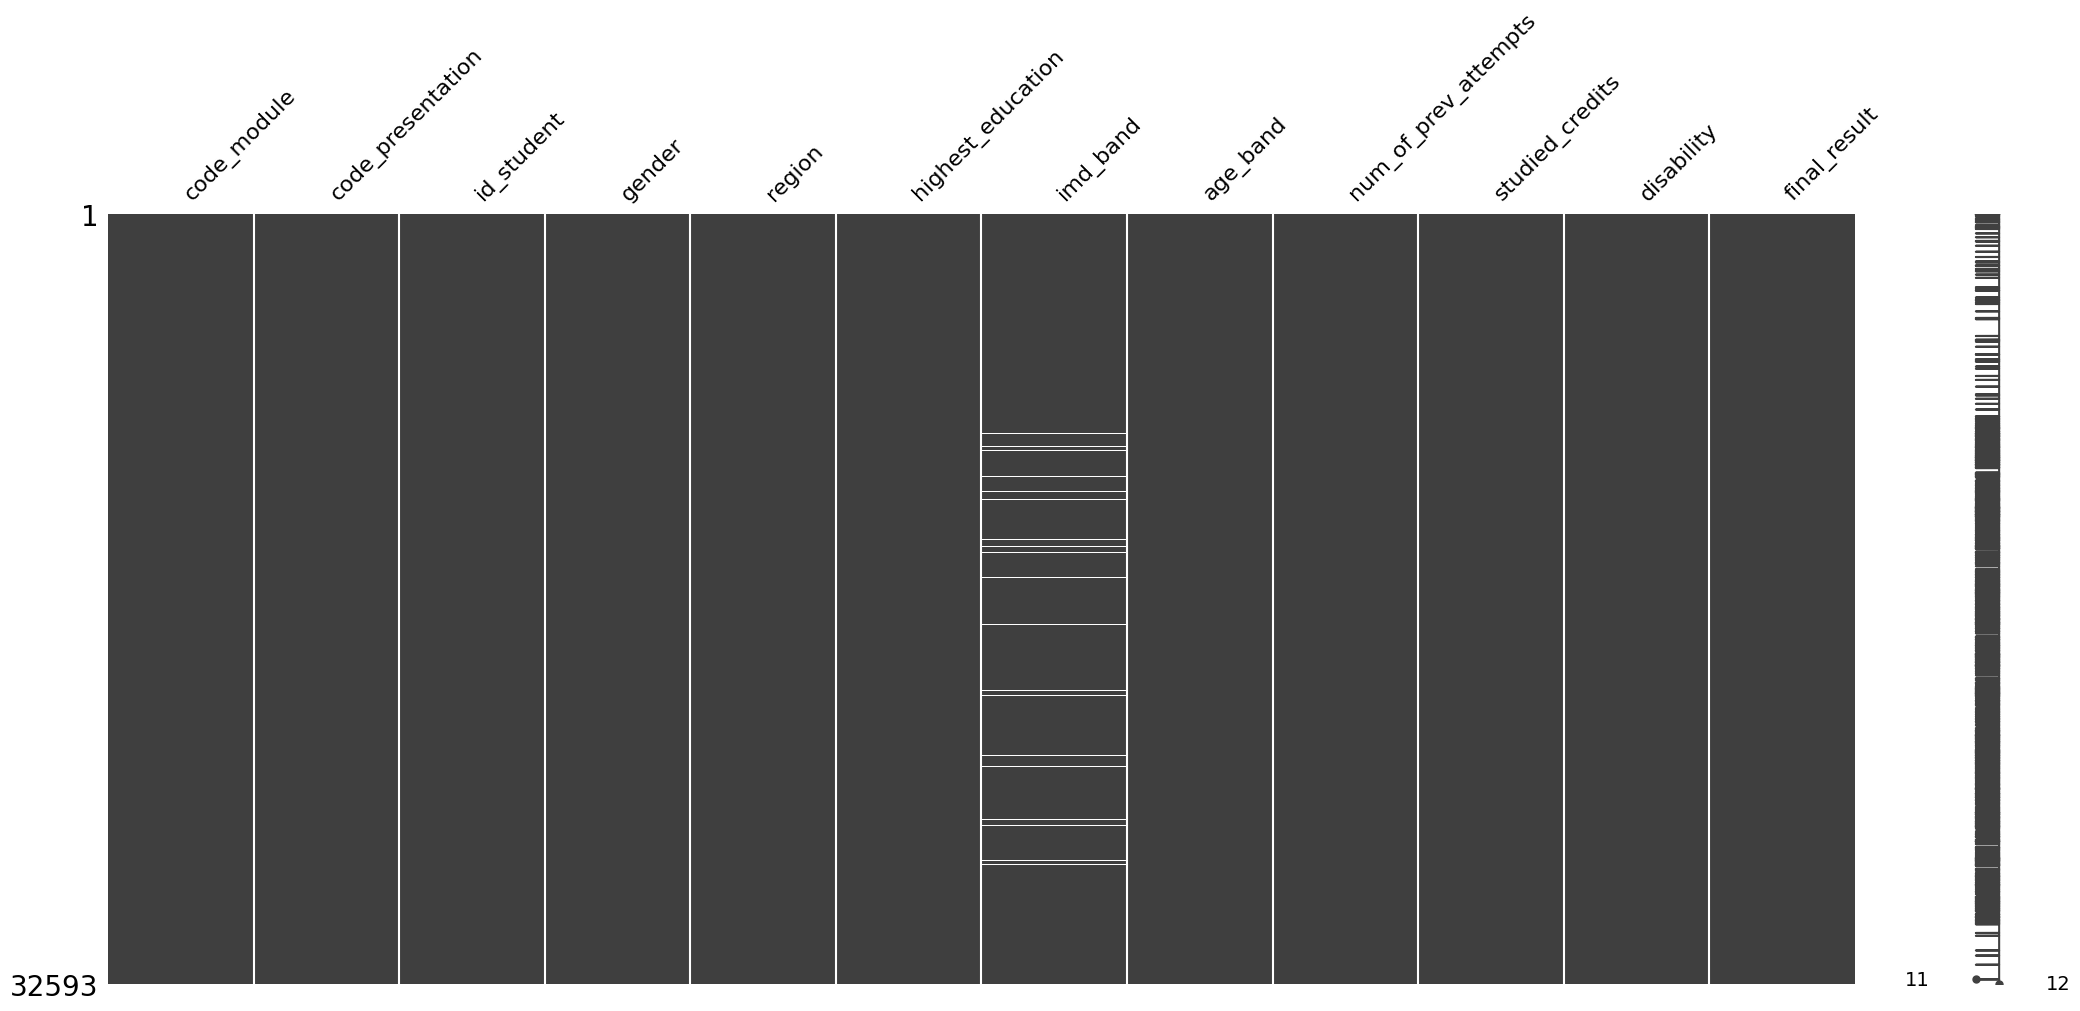

In [ ]:
#!pip install missingno

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(students)
plt.show()


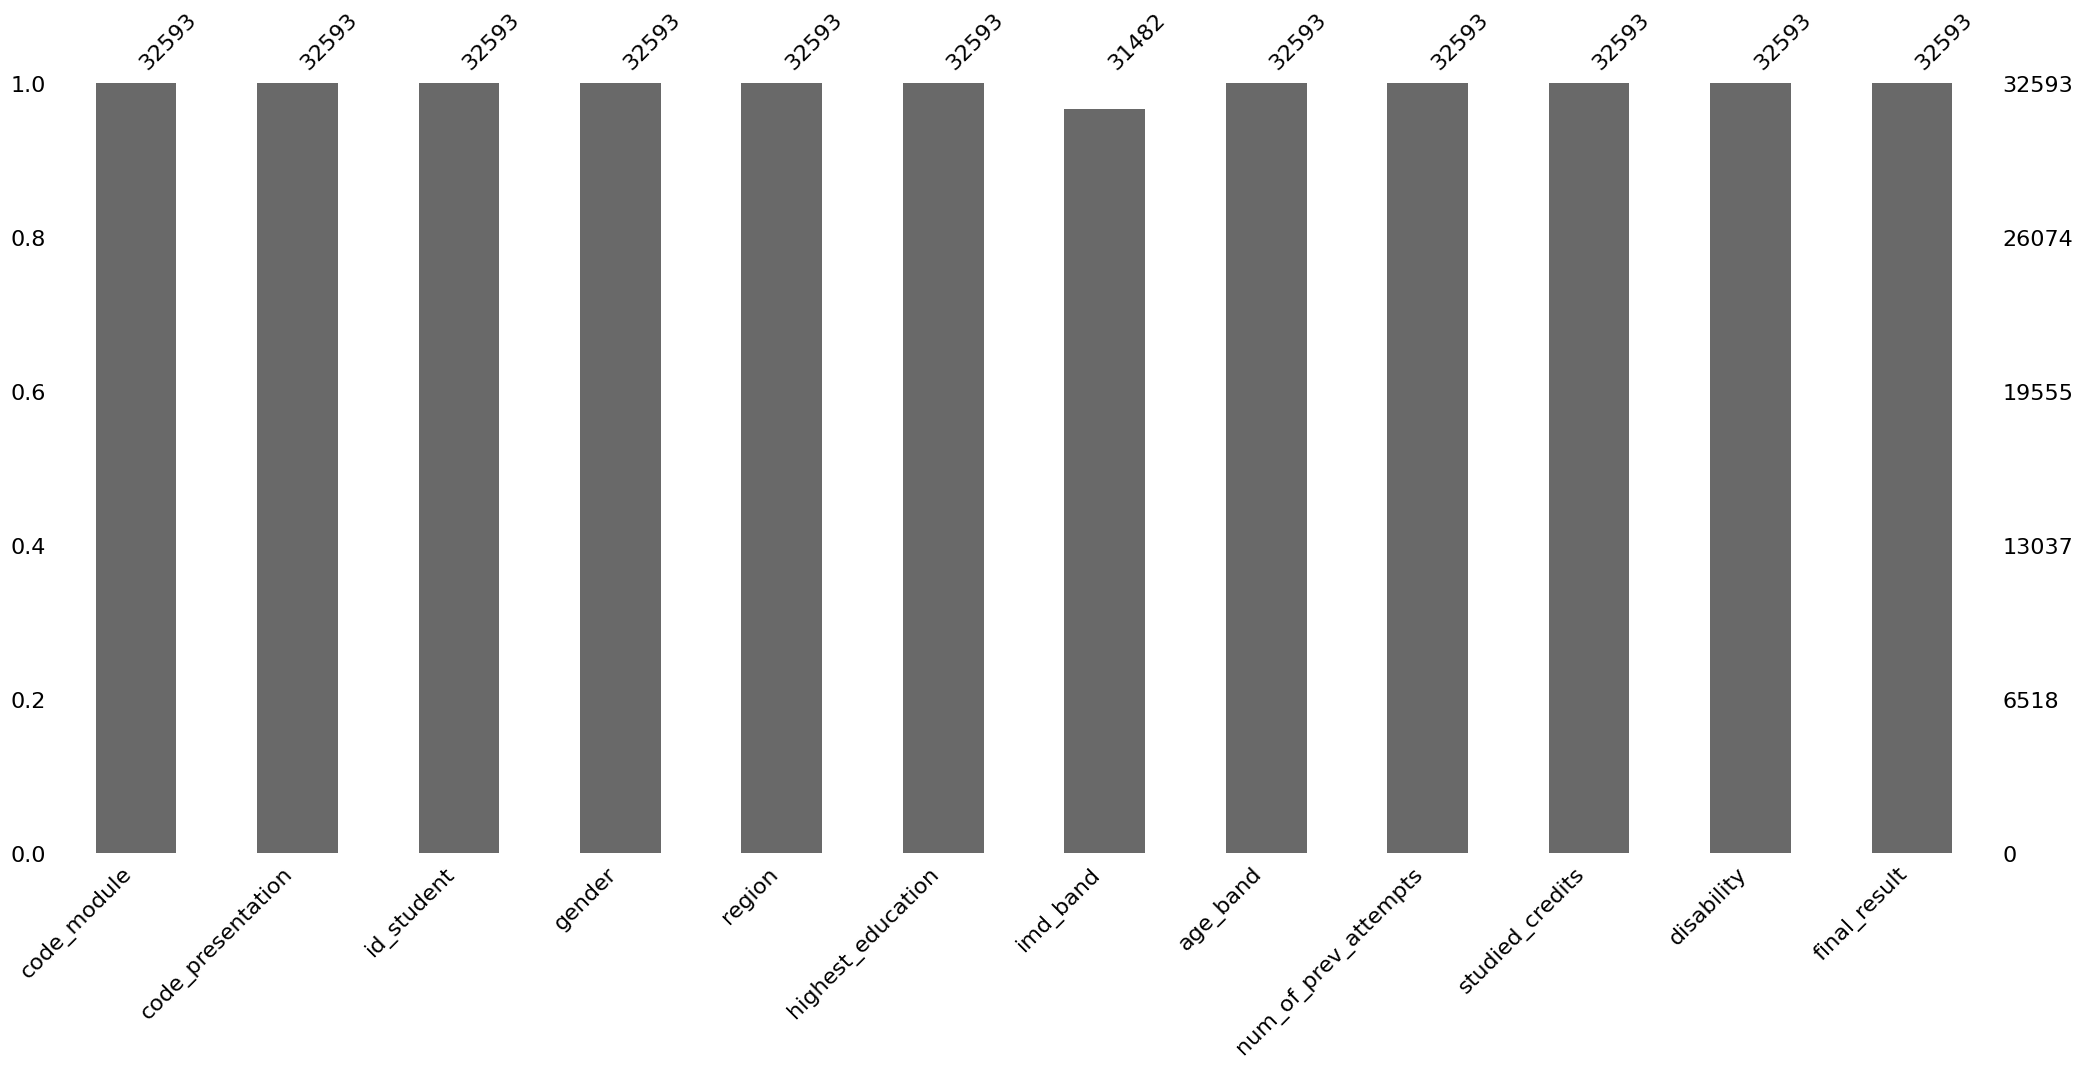

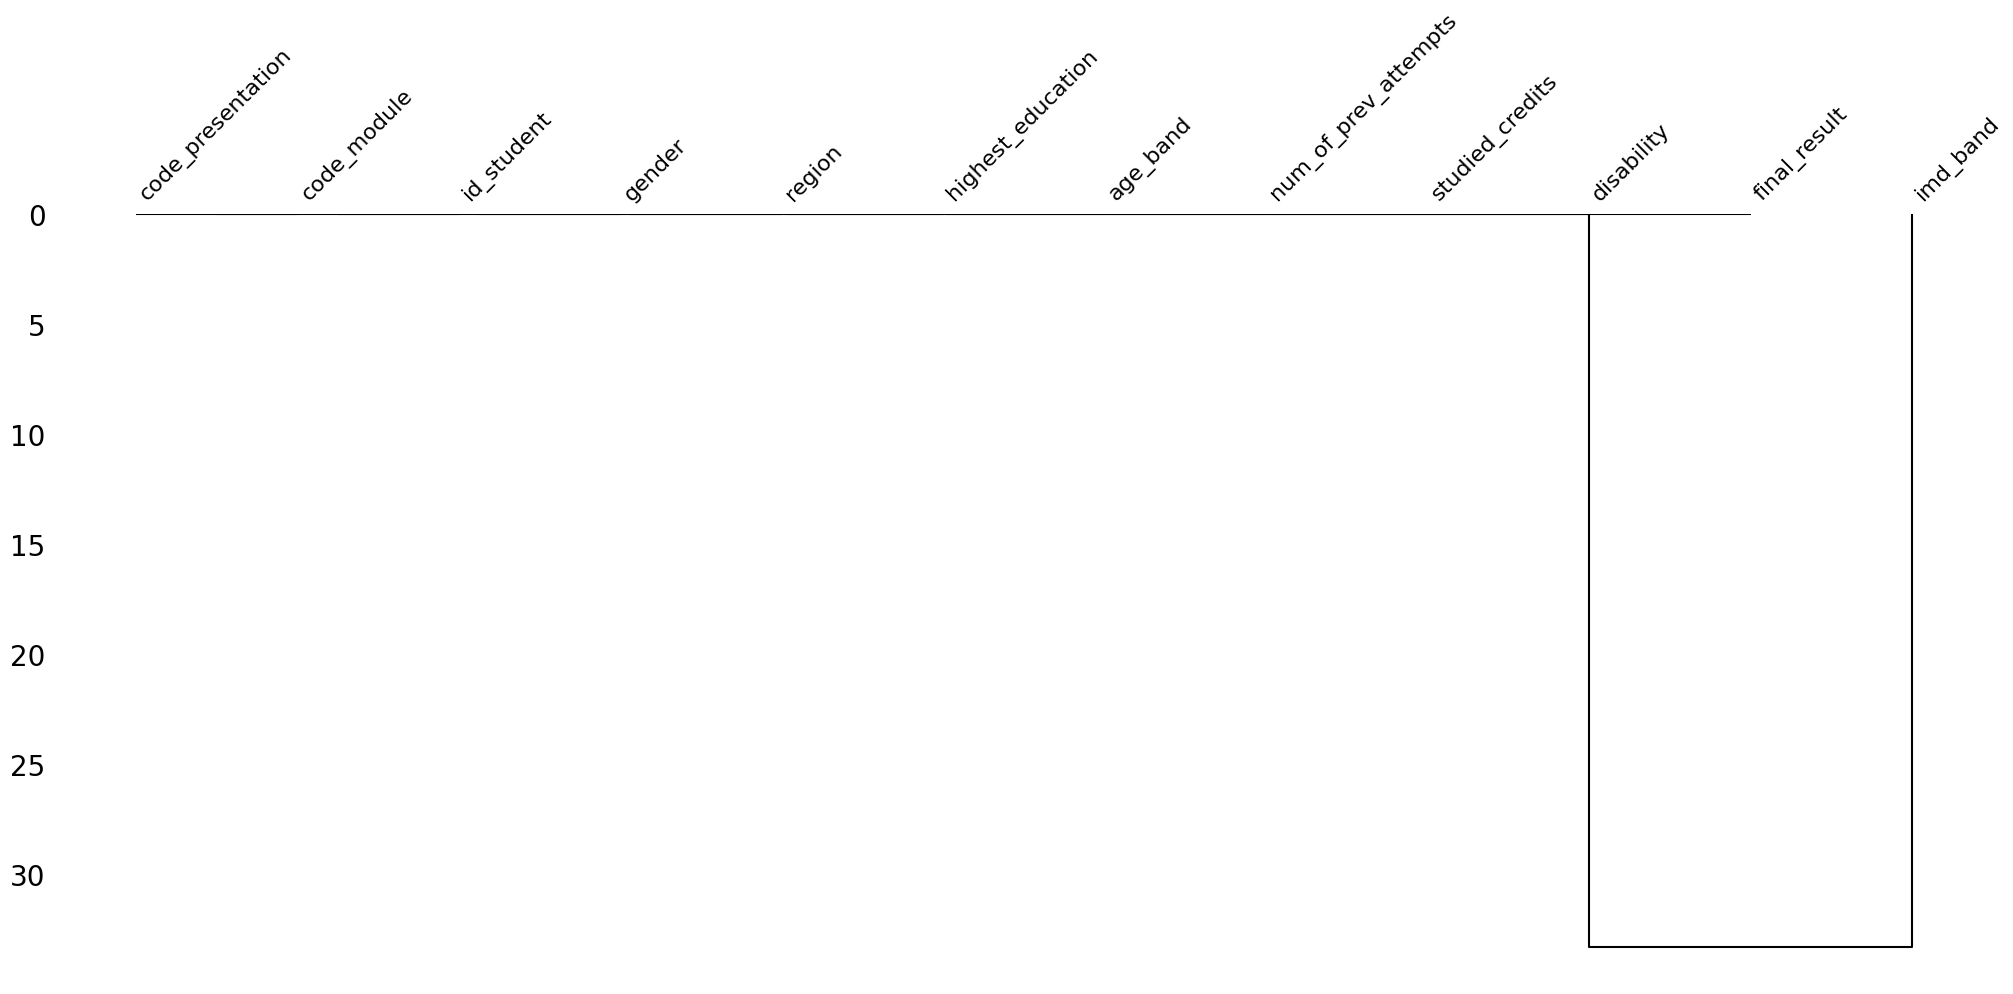

In [ ]:

msno.bar(students)
plt.show()

msno.dendrogram(students)
plt.show()


In [ ]:
columns_of_interest = ['age_band', 'gender', 'region', 'code_module', 'code_presentation', 'disability', 'final_result', 'imd_band']
subset_df = students[columns_of_interest]
missing_cross_tab = pd.crosstab(subset_df['imd_band'].isnull(), [subset_df['age_band'], subset_df['gender'], subset_df['region'], subset_df['code_module'], subset_df['code_presentation'], subset_df['disability'], subset_df['final_result']])



age_band                         0-35                                  
gender                              F                                  
region            East Anglian Region                                  
code_module                       AAA                                  
code_presentation               2013J                     2014J        
disability                          N                   Y     N        
final_result                     Fail Pass Withdrawn Pass  Fail Pass   
imd_band                                                               
False                               2    6         4    1     1    6  \
True                                0    0         0    0     0    0   

age_band                                           ...                 55<=   
gender                                             ...                    M   
region                                             ... West Midlands Region   
code_module                                   BBB  ...                  DDD   
code_presentation                           2013B  ...                2014J   
disability                     Y                N  ...                    N   
final_result      Withdrawn Fail Pass Distinction  ...            Withdrawn   
imd_band                                           ...                        
False                     2    1    2           8  ...                    1  \
True                      0    0    0           0  ...                    0   

age_band                                                                      
gender                                                                        
region                  Yorkshire Region                                      
code_module         FFF              AAA         CCC        DDD   EEE   FFF   
code_presentation 2014J            2013J       2014J      2013J 2014J 2013B   
disability            N                N           N          N     N     N   
final_result       Pass             Pass Distinction Pass  Pass  Pass  Pass   
imd_band                                                                      
False                 1                1           2    2     2     1     1  \
True                  0                0           0    0     0     0     0   

age_band                           
gender                             
region                             
code_module                        
code_presentation 2013J     2014J  
disability            N         N  
final_result       Pass Withdrawn  
imd_band                           
False                 1         1  
True                  0         0  

[2 rows x 5502 columns]

In [ ]:
%pip install statsmodels

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm



# Create a contingency table of missingness of 'imd_band' and other variables
contingency_table = pd.crosstab(students['imd_band'].isnull(), [students['age_band'], students['gender'], students['region'], students['code_module'], students['code_presentation'], students['disability'], students['final_result']])

# Chi-square test for association
chi2, p, _, _ = stats.chi2_contingency(contingency_table)
print("Chi-square test p-value:", p)

# Logistic regression
students['missing_imd'] = students['imd_band'].isnull().astype(int)  # Create a binary indicator variable for missingness

# Encode categorical variables as dummy variables
students = pd.get_dummies(students, columns=['age_band', 'gender', 'region', 'code_module', 'code_presentation', 'disability', 'final_result'], drop_first=True)

# Prepare the data for logistic regression
X = students.drop(columns=['missing_imd', 'imd_band'])
y = students['missing_imd']

# Fit the logistic regression model
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary())



6529.50s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 69.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'scipy.signal'

In [ ]:
#!pip install pymc3
#!pip install --upgrade numpy
%pip install numpy==1.21.2
#from numpy import distutils


#import pandas as pd

import pymc3 as pm
#import matplotlib.pyplot as plt



5612.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ModuleNotFoundError: No module named 'numpy.distutils'

In [ ]:


# Create a binary indicator variable for missingness in 'imd_band'
students['imd_missing'] = students['imd_band'].isnull()

# Create a Bayesian missingness model
with pm.Model() as model:
    imd_missing = pm.Bernoulli('imd_missing', p=0.5, observed=students['imd_missing'])

    trace = pm.sample(2000, tune=1000, cores=1)

# Plot the summary of missingness
pm.plot_posterior(trace, var_names=['imd_missing'])
plt.xlabel('Probability of Missingness')
plt.ylabel('Frequency')
plt.title('Missingness Summary')
plt.show()
